# Notebook to smooth out manually collected data

In [8]:
import numpy as np
import scipy.interpolate
import scipy.signal

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# load experimental data
rh_data = '/home/moon/uncertainty_estimator/cpox_pt/horn_data/rh_profiles_raw.csv'
df_out_filename = '/home/moon/uncertainty_estimator/cpox_pt/horn_data/rh_profiles_smooth.csv'
df = pd.read_csv(rh_data)

pt_data = '/home/moon/uncertainty_estimator/cpox_pt/horn_data/pt_profiles_raw.csv'
df_out_filename = '/home/moon/uncertainty_estimator/cpox_pt/horn_data/pt_profiles_smooth.csv'
df = pd.read_csv(pt_data)



Text(0.5, 1.0, 'Raw Data')

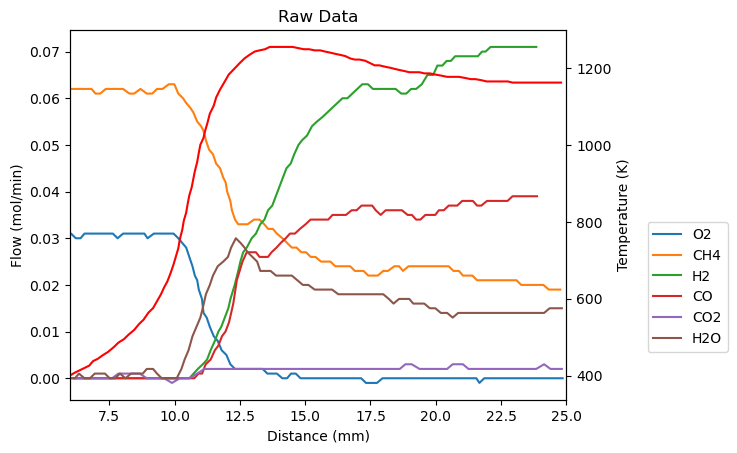

In [31]:
# Plot the "before"
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.plot(df['Distance O2'].values + 10.0, df['O2'].values, label='O2', color=colors[0])
plt.plot(df['Distance CH4'].values + 10.0, df['CH4'].values, label='CH4', color=colors[1])
plt.plot(df['Distance H2'].values + 10.0, df['H2'].values, label='H2', color=colors[2])
plt.plot(df['Distance CO'].values + 10.0, df['CO'].values, label='CO', color=colors[3])
plt.plot(df['Distance CO2'].values + 10.0, df['CO2'].values, label='CO2', color=colors[4])
plt.plot(df['Distance H2O'].values + 10.0, df['H2O'].values, label='H2O', color=colors[5])


ax1 = plt.gca()
ylim = ax1.get_ylim()
plt.ylim(ylim)

ax2 = ax1.twinx()
ax2.plot(df['Distance T'].values + 10.0, df['Temperature (Celsius)'].values + 273.15, label='Temperature', color='r')
ax2.set_ylabel('Temperature (K)')

ax1.set_xlim([6, 25])
ax1.set_xlabel('Distance (mm)')
ax1.set_ylabel('Flow (mol/min)')
ax1.legend(bbox_to_anchor=(1.15, 0.5))
plt.title('Raw Data')


# Interpolate to get uniform distances across species

In [32]:
def get_interpolation(input_x, input_y, output_x):  
    f = scipy.interpolate.interp1d(input_x, input_y, fill_value="extrapolate")
    output_y = np.zeros_like(output_x)
    for i in range(len(output_x)):
        output_y[i] = f(output_x[i])
        if np.isnan(output_y[i]):
            output_y[i] = output_y[i - 1]
        
    
    return output_y

Text(0.5, 1.0, 'Raw Data')

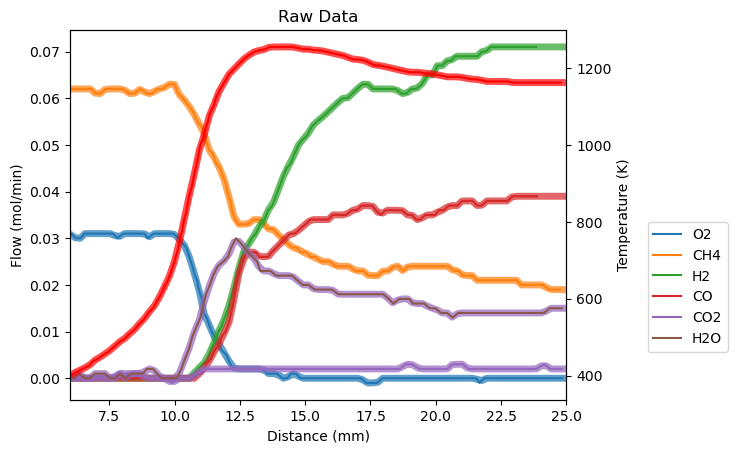

In [33]:
# Plot the interpolations
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

xs = np.linspace(6.0, 25.0, 101)

interp_width = 5.0
interp_alpha = 0.7

O2_interp = get_interpolation(df['Distance O2'].values + 10.0, df['O2'].values, xs)
CH4_interp = get_interpolation(df['Distance CH4'].values + 10.0, df['CH4'].values, xs)
H2_interp = get_interpolation(df['Distance H2'].values + 10.0, df['H2'].values, xs)
CO_interp = get_interpolation(df['Distance CO'].values + 10.0, df['CO'].values, xs)
CO2_interp = get_interpolation(df['Distance CO2'].values + 10.0, df['CO2'].values, xs)
H2O_interp = get_interpolation(df['Distance H2O'].values + 10.0, df['H2O'].values, xs)
T_interp = get_interpolation(df['Distance T'].values + 10.0, df['Temperature (Celsius)'].values + 273.15, xs)

plt.plot(xs, O2_interp, label='_no_label', color=colors[0], alpha=interp_alpha, linewidth=interp_width)
plt.plot(df['Distance O2'].values + 10.0, df['O2'].values, label='O2', color=colors[0])

plt.plot(xs, CH4_interp, label='_no_label', color=colors[1], alpha=interp_alpha, linewidth=interp_width)
plt.plot(df['Distance CH4'].values + 10.0, df['CH4'].values, label='CH4', color=colors[1])

plt.plot(xs, H2_interp, label='_no_label', color=colors[2], alpha=interp_alpha, linewidth=interp_width)
plt.plot(df['Distance H2'].values + 10.0, df['H2'].values, label='H2', color=colors[2])

plt.plot(xs, CO_interp, label='_no_label', color=colors[3], alpha=interp_alpha, linewidth=interp_width)
plt.plot(df['Distance CO'].values + 10.0, df['CO'].values, label='CO', color=colors[3])

plt.plot(xs, CO2_interp, label='_no_label', color=colors[4], alpha=interp_alpha, linewidth=interp_width)
plt.plot(df['Distance CO2'].values + 10.0, df['CO2'].values, label='CO2', color=colors[4])

plt.plot(xs, H2O_interp, label='_no_label', color=colors[4], alpha=interp_alpha, linewidth=interp_width)
plt.plot(df['Distance H2O'].values + 10.0, df['H2O'].values, label='H2O', color=colors[5])

ax1 = plt.gca()
ylim = ax1.get_ylim()
plt.ylim(ylim)

ax2 = ax1.twinx()
plt.plot(xs, T_interp, label='_no_label', color='r', alpha=interp_alpha, linewidth=interp_width)
ax2.plot(df['Distance T'].values + 10.0, df['Temperature (Celsius)'].values + 273.15, label='Temperature', color='r')

ax2.set_ylabel('Temperature (K)')

ax1.set_xlim([6, 25])
ax1.set_xlabel('Distance (mm)')
ax1.set_ylabel('Flow (mol/min)')
ax1.legend(bbox_to_anchor=(1.15, 0.5))
plt.title('Raw Data')


Text(0.5, 1.0, 'Raw Data')

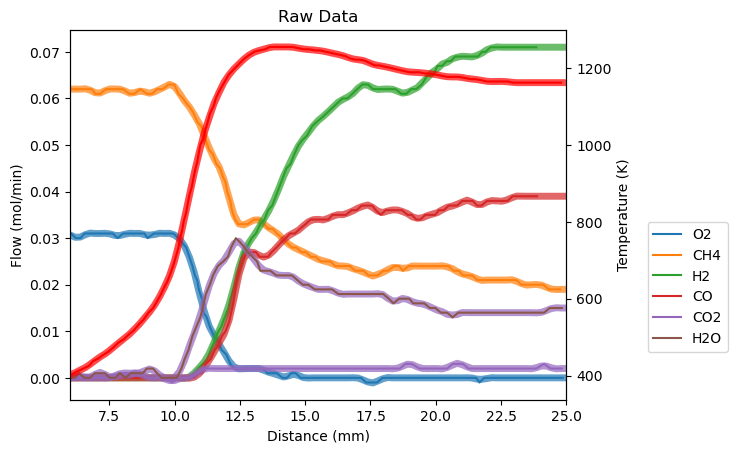

In [34]:
# Plot the smoothed results
window_length = 11
window_length = 5

polyorder = 2
mode = 'nearest'
smooth_O2 = scipy.signal.savgol_filter(O2_interp, window_length, polyorder, mode=mode)
smooth_CH4 = scipy.signal.savgol_filter(CH4_interp, window_length, polyorder, mode=mode)
smooth_H2 = scipy.signal.savgol_filter(H2_interp, window_length, polyorder, mode=mode)
smooth_CO = scipy.signal.savgol_filter(CO_interp, window_length, polyorder, mode=mode)
smooth_CO2 = scipy.signal.savgol_filter(CO2_interp, window_length, polyorder, mode=mode)
smooth_H2O = scipy.signal.savgol_filter(H2O_interp, window_length, polyorder, mode=mode)
smooth_T = scipy.signal.savgol_filter(T_interp, window_length, polyorder, mode=mode)

plt.plot(xs, smooth_O2, label='_no_label', color=colors[0], alpha=interp_alpha, linewidth=interp_width)
plt.plot(df['Distance O2'].values + 10.0, df['O2'].values, label='O2', color=colors[0])

plt.plot(xs, smooth_CH4, label='_no_label', color=colors[1], alpha=interp_alpha, linewidth=interp_width)
plt.plot(df['Distance CH4'].values + 10.0, df['CH4'].values, label='CH4', color=colors[1])

plt.plot(xs, smooth_H2, label='_no_label', color=colors[2], alpha=interp_alpha, linewidth=interp_width)
plt.plot(df['Distance H2'].values + 10.0, df['H2'].values, label='H2', color=colors[2])

plt.plot(xs, smooth_CO, label='_no_label', color=colors[3], alpha=interp_alpha, linewidth=interp_width)
plt.plot(df['Distance CO'].values + 10.0, df['CO'].values, label='CO', color=colors[3])

plt.plot(xs, smooth_CO2, label='_no_label', color=colors[4], alpha=interp_alpha, linewidth=interp_width)
plt.plot(df['Distance CO2'].values + 10.0, df['CO2'].values, label='CO2', color=colors[4])

plt.plot(xs, smooth_H2O, label='_no_label', color=colors[4], alpha=interp_alpha, linewidth=interp_width)
plt.plot(df['Distance H2O'].values + 10.0, df['H2O'].values, label='H2O', color=colors[5])

ax1 = plt.gca()
ylim = ax1.get_ylim()
plt.ylim(ylim)

ax2 = ax1.twinx()
plt.plot(xs, smooth_T, label='_no_label', color='r', alpha=interp_alpha, linewidth=interp_width)
ax2.plot(df['Distance T'].values + 10.0, df['Temperature (Celsius)'].values + 273.15, label='Temperature', color='r')

ax2.set_ylabel('Temperature (K)')

ax1.set_xlim([6, 25])
ax1.set_xlabel('Distance (mm)')
ax1.set_ylabel('Flow (mol/min)')
ax1.legend(bbox_to_anchor=(1.15, 0.5))
plt.title('Raw Data')


In [35]:
# Save results in new df
cols = [
    'Distance (mm)',
    'Temperature (K)',
    'O2 (mol/min)',
    'CH4 (mol/min)',
    'H2 (mol/min)',
    'CO (mol/min)',
    'CO2 (mol/min)',
    'H2O (mol/min)'
]
data = []
for i in range(len(xs)):
    data.append([
        xs[i],
        smooth_T[i],
        smooth_O2[i],
        smooth_CH4[i],
        smooth_H2[i],
        smooth_CO[i],
        smooth_CO2[i],
        smooth_H2O[i]
    ])

# Create the pandas DataFrame
df_out = pd.DataFrame(data, columns=cols)
df_out.to_csv(df_out_filename, index=False)